## CS530 Data Mining Homework 4 part 2

#### Question 2 (4 points)

a. Run k-means clustering algorithm using Scikit-learn on the Iris dataset. Create silhouette plots for different k values and find the best k.

In [24]:
## Your code goes here
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data #X is numpy ndarray
y = iris.target

import numpy as np
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Your code goes here.
def makeSilhouettePlot(X, k):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_ylim([0, len(X) + (k + 1) * 10])


    clust = KMeans(n_clusters=k, random_state=0).fit(X) #contains cluster indices of data
    clust_labels = clust.fit_predict(X)
    silhouette_avg = silhouette_score(X, clust_labels) #average value of all samples
    print("For k clusters =", k,
            "The average silhouette_score is :", silhouette_avg)
    silhouette_scores = metrics.silhouette_score(X, clust_labels, metric='euclidean')
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, clust_labels)

    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[clust_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
        colors = cm.nipy_spectral(clust_labels.astype(float) / k)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

For k clusters = 2 The average silhouette_score is : 0.6808136202713507


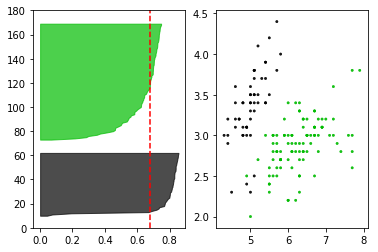

In [25]:
makeSilhouettePlot(X, k=2)

For k clusters = 3 The average silhouette_score is : 0.5525919445213676


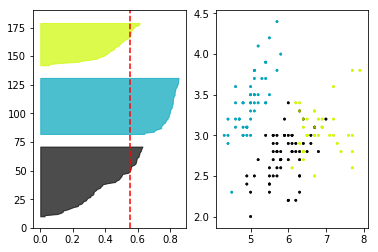

In [26]:
makeSilhouettePlot(X, k=3)

For k clusters = 4 The average silhouette_score is : 0.49782569007544936


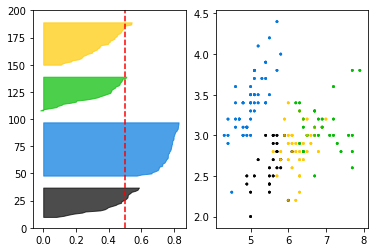

In [27]:
makeSilhouettePlot(X, k=4)

For k clusters = 5 The average silhouette_score is : 0.49285559179751404


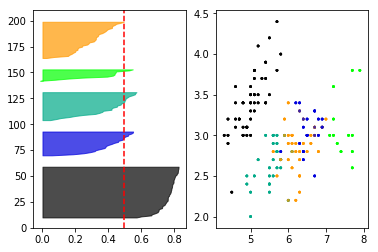

In [28]:
makeSilhouettePlot(X, k=5)

The best k seems to be either 2 or 3 because those silhouette scores are above average.

b. Compare your clustering results with the actual labels in the Iris dataset. Is there a difference? Explain what might be the cause of the difference.

## Your code goes here
There are 3 clusters in the Iris dataset. It was hard for me to decide whether k=2 or k=3 was a better fit for the data based on my clustering results because both seem reasonable given the visualization.

#### Question 3 (3 points)

a. Look at the hierarchical clustering documentation for [scipy](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html). Perform hierachical clustering on the Iris dataset using single, complete, average and centroid linkage. Plot their associated dendrogram.

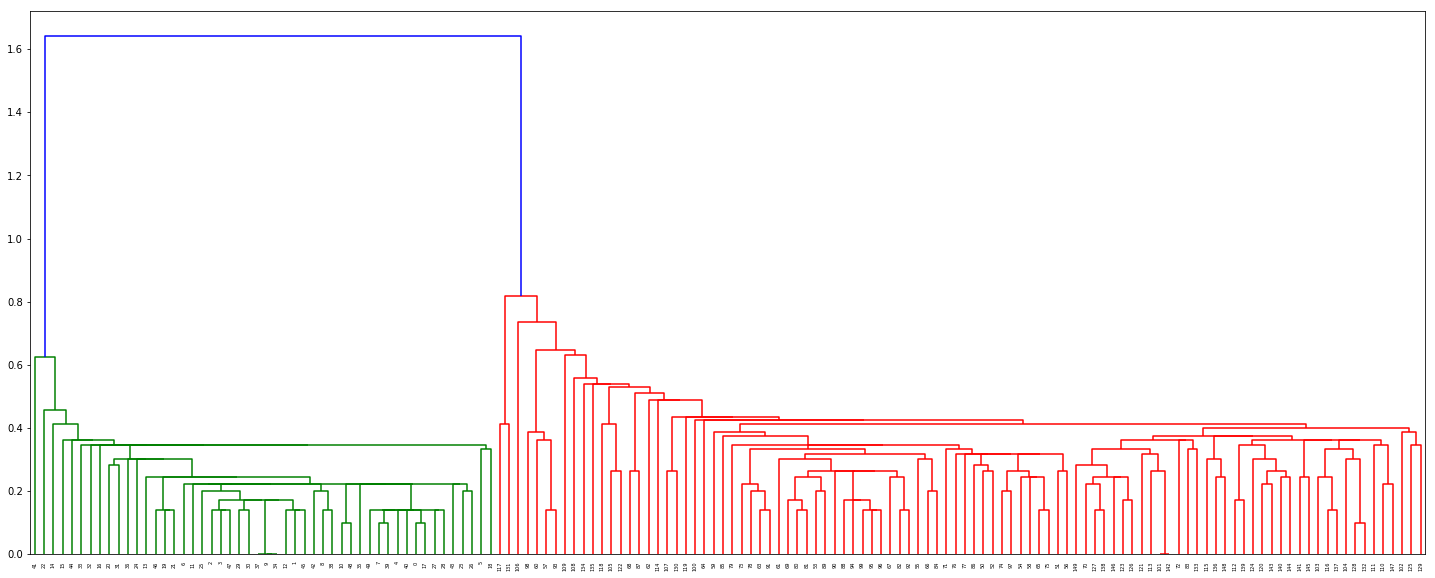

In [32]:
# Your code goes here
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

#SINGLE
Z = linkage(X, 'single')
fig = plt.figure(figsize=(25,10))
dn = dendrogram(Z)
plt.show()

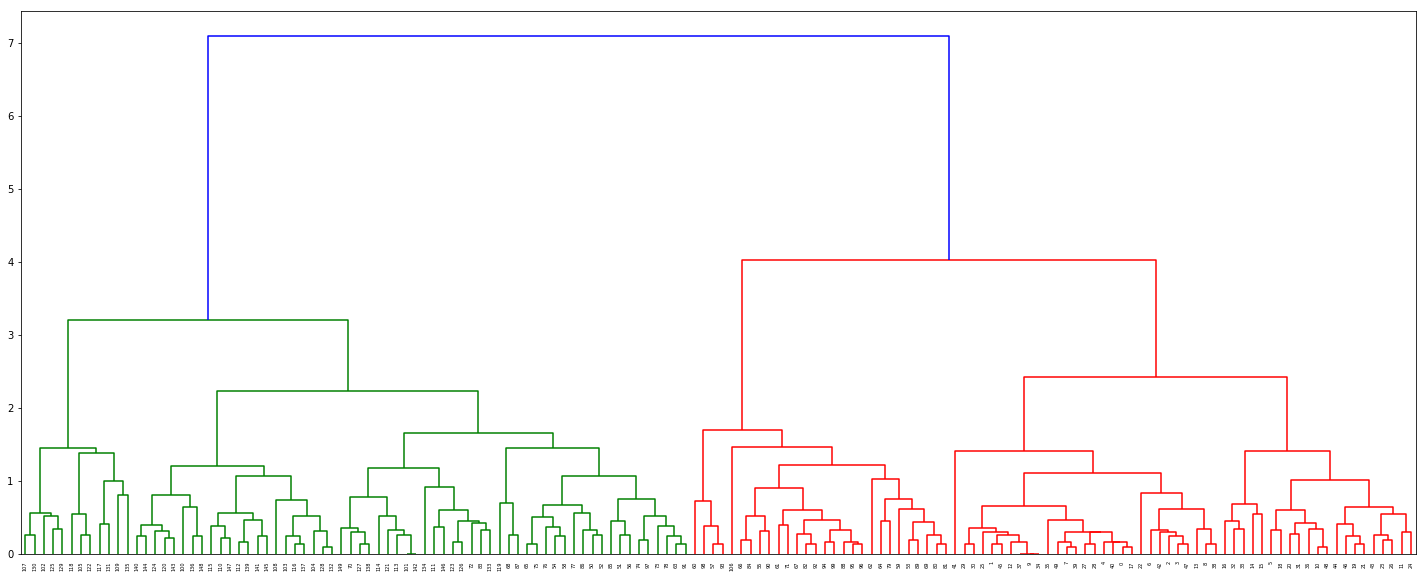

In [35]:
#COMPLETE
Z = linkage(X, 'complete')
fig = plt.figure(figsize=(25,10))
dn = dendrogram(Z)
plt.show()

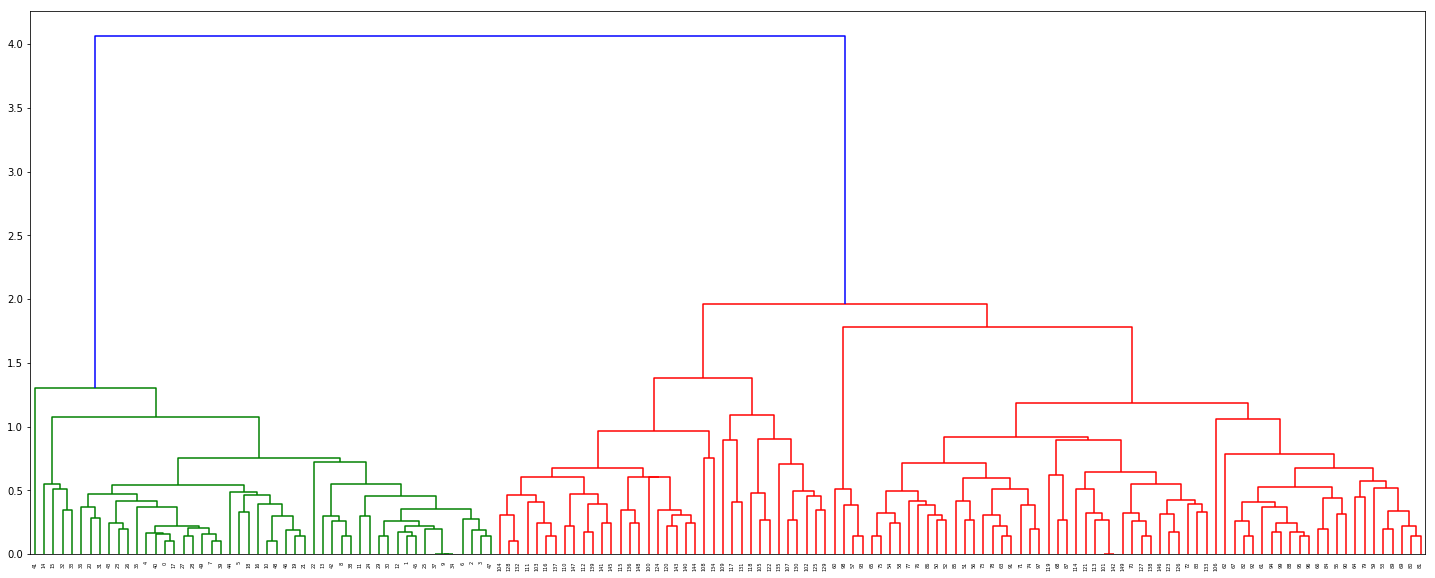

In [36]:
#AVERAGE
Z = linkage(X, 'average')
fig = plt.figure(figsize=(25,10))
dn = dendrogram(Z)
plt.show()

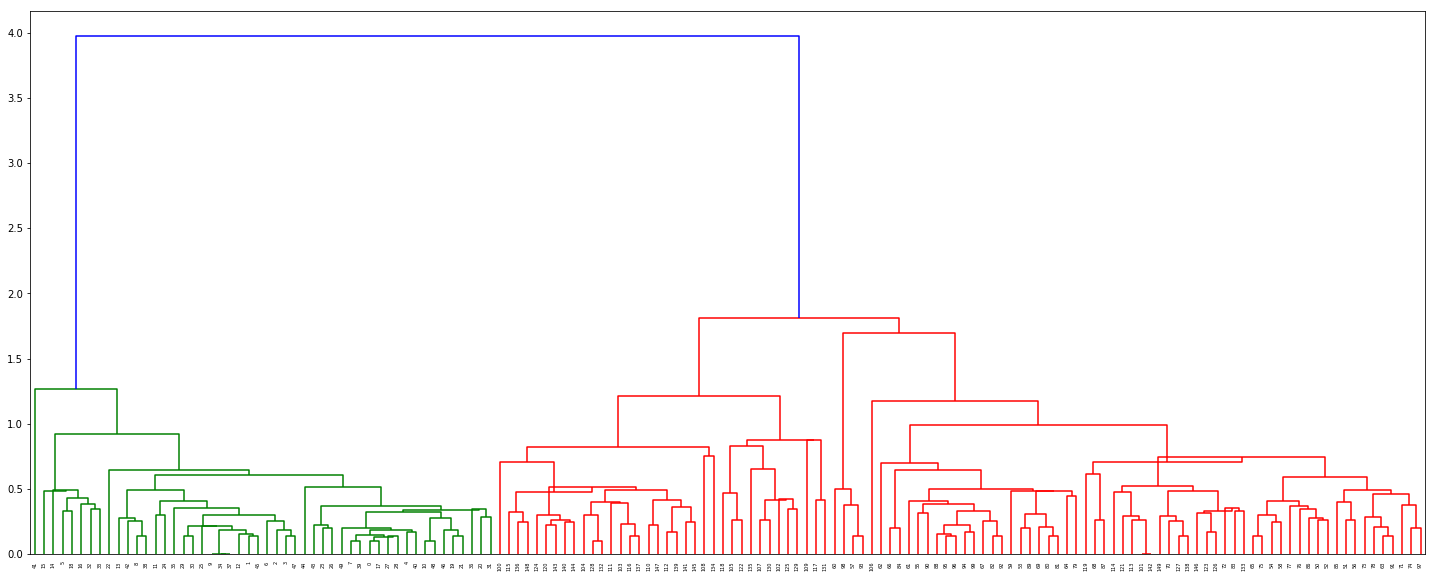

In [37]:
#CENTROID
Z = linkage(X, 'centroid')
fig = plt.figure(figsize=(25,10))
dn = dendrogram(Z)
plt.show()

b. Look at the dendrograms more closely and explain the difference between each linkage method.

# Your discussion goes here
The single linkage method uses the minimum distance between any two points in different clusters (Nearest Point Algorithm). The complete linkage method uses the maximum distance (Farthest Point Algorithm). The average linkage method uses the unweighted pair group method (UPGMA). The centroid linkage uses the Euclidean distance between centroids of two clusters.

c. Choose your linkage method and the number of clusters you would like to keep. Create clustering labels for the Iris dataset and compare with the actual labels. Explain the difference.

In [40]:
# Your code goes here
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(X)
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Your discussion goes here
My clustering labels match the actual labels.